<a href="https://colab.research.google.com/github/sassom2112/ideal-rotary-phone/blob/master/Single_Neuron_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Loading Datasets

In [2]:
from google.colab import files
uploaded = files.upload()

Saving winequality-white.csv to winequality-white.csv
Saving winequality-red.csv to winequality-red.csv


+ Load datasets with correct delimiter
+ Add a wine color column
+ Concatenate the two datasets
+ Seperate `Features` (X) and `Labels` (y)

In [6]:
# Load the datasets with the correct delimiter
red_wine = pd.read_csv('winequality-red.csv', delimiter=';')
white_wine = pd.read_csv('winequality-white.csv', delimiter=';')

# Add a 'wine_color' column (1 for red, 0 for white)
red_wine['wine_color'] = 1
white_wine['wine_color'] = 0

# Concatenate the two datasets into one
all_wine = pd.concat([red_wine, white_wine], ignore_index=True)


# Separate features (X) and labels (y)
X = all_wine.drop(columns=['wine_color'])  # Features
y = all_wine['wine_color']  # Labels (1 for red, 0 for white)

In [8]:
def manual_train_test_split(X, y, test_size=0.2, shuffle=True):
    # Convert Pandas DataFrames or Series to NumPy arrays
    if isinstance(X, pd.DataFrame) or isinstance(X, pd.Series):
        X = X.to_numpy()
    if isinstance(y, pd.DataFrame) or isinstance(y, pd.Series):
        y = y.to_numpy()

    if X.shape[0] != y.shape[0]:
        raise ValueError("Input and target arrays must have the same number of samples.")
    if shuffle:
        indices = np.arange(X.shape[0])
        np.random.shuffle(indices)
        X = X[indices]
        y = y[indices]

    # Calculate the split index based on test_size
    split_index = int(X.shape[0] * (1 - test_size))

    # Split the data
    X_train, X_test = X[:split_index], X[split_index:]
    y_train, y_test = y[:split_index], y[split_index:]

    return X_train, X_test, y_train, y_test

# Example usage (assuming X and y are numpy arrays)
X_train, X_test, y_train, y_test = manual_train_test_split(X, y, test_size=0.2)

In [12]:

class SingleNeuronClassifier:
    def __init__(self, num_features):
        self.w = np.random.randn(num_features) * 0.01  # Initialize weights randomly
        self.w_0 = 0.0  # Initialize bias term

    def sigmoid(self, z):
        # Clip values of z to prevent overflow in exp function
        z = np.clip(z, -500, 500)
        return 1 / (1 + np.exp(-z))  # Sigmoid activation function

    def predict(self, x):
        z = np.dot(x, self.w) + self.w_0  # Linear combination
        return self.sigmoid(z)  # Apply sigmoid to get prediction

    def train(self, X, y, epochs=100, learning_rate=0.01):
        for epoch in range(epochs):
            total_loss = 0
            for x_i, y_i in zip(X, y):
                y_pred = self.predict(x_i)

                # Binary cross-entropy loss (log loss)
                loss = -(y_i * np.log(y_pred + 1e-6) + (1 - y_i) * np.log(1 - y_pred + 1e-6))
                total_loss += loss

                # Gradient descent updates
                gradient_w_0 = y_pred - y_i  # Gradient for bias
                self.w_0 -= learning_rate * gradient_w_0  # Update bias term

                gradient_w = (y_pred - y_i) * x_i  # Gradient for weights
                self.w -= learning_rate * gradient_w  # Update weights

            # Store loss for each epoch
            loss_values.append(total_loss)

            if epoch % 10 == 0:
                print(f"Epoch {epoch}, Loss: {total_loss}")

    def classify(self, x):
        return 1 if self.predict(x) >= 0.5 else 0

Epoch 0, Loss: 7587.696361735888
Epoch 10, Loss: 5706.495537461753
Epoch 20, Loss: 5241.766705151192
Epoch 30, Loss: 5069.740054219672
Epoch 40, Loss: 4876.306009745006
Epoch 50, Loss: 4650.771339356524
Epoch 60, Loss: 4494.944426772084
Epoch 70, Loss: 4412.665958195099
Epoch 80, Loss: 4060.4572307719477
Epoch 90, Loss: 4113.504814317497
Epoch 100, Loss: 3955.035843530898
Epoch 110, Loss: 4059.86143499861
Epoch 120, Loss: 3916.3273770873047
Epoch 130, Loss: 4022.3888330133827
Epoch 140, Loss: 3788.18796802822
Epoch 150, Loss: 3684.979258470011
Epoch 160, Loss: 3577.120273947191
Epoch 170, Loss: 3744.360195093518
Epoch 180, Loss: 3495.2398286150355
Epoch 190, Loss: 3224.7880726292533
Epoch 200, Loss: 3507.490279988646
Epoch 210, Loss: 3395.64382620267
Epoch 220, Loss: 3264.24864441671
Epoch 230, Loss: 3384.5058741340645
Epoch 240, Loss: 3365.95812645236
Epoch 250, Loss: 3459.480317514258
Epoch 260, Loss: 3412.261216917786
Epoch 270, Loss: 3260.7870156136455
Epoch 280, Loss: 3377.6217307

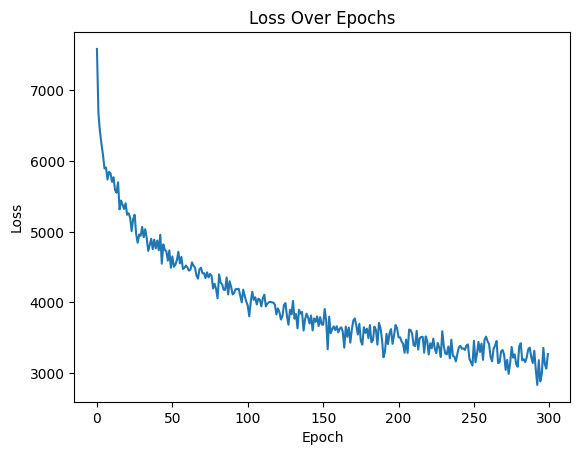

In [13]:
loss_values = []  # List to store loss values for each epoch

# Train the model
num_features = X_train.shape[1]
single_neuron_classifier = SingleNeuronClassifier(num_features)
single_neuron_classifier.train(X_train, y_train, epochs=300, learning_rate=0.01)

# Evaluate the model on the test set
correct = 0
for x_i, y_i in zip(X_test, y_test):
    prediction = single_neuron_classifier.classify(x_i)
    if prediction == y_i:
        correct += 1

accuracy = correct / len(y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# After training, plot the loss values
plt.plot(loss_values)
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()